In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
model = load_model('./model_cifar-10.keras')
#model.compile(optimizer='adam', 
#              loss='categorical_crossentropy', 
#              metrics=['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,854,752 (7.08 MB)

 Trainable params: 618,250 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,236,502 (4.72 MB)

None


In [3]:
from PIL import Image

In [4]:
image = Image.open('./samoyed.jpg')            # 画像の読み込み
image_resized = image.resize((32, 32))       # 32 * 32 にリサイズ

image_array = np.array(image_resized)                  # ベクトル化
image_array = image_array.astype('float32') / 255.0    # 標準化
image_array = np.expand_dims(image_array, axis=0)      # 次元の追加

print(image_array.shape)                     # データ構造の表示

(1, 32, 32, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
(1, 32, 32, 3)
[5]


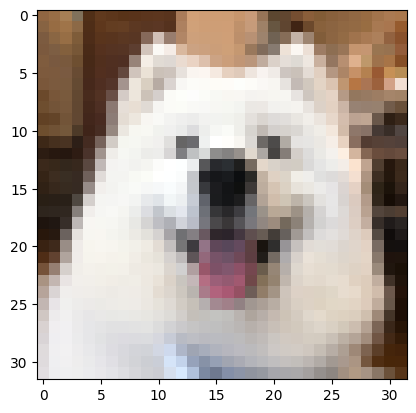

In [5]:
y_pred = model.predict(image_array)

plt.imshow(image_resized)                    # 画像の表示
print(image_array.shape)                     # データ構造の表示
print(np.argmax(y_pred, axis=1))             # 予測したクラス

In [6]:
import cv2

In [7]:
image = cv2.imread('./maine_coon.jpg')              # 画像の読み込み     
image_resized = cv2.resize(image, (32, 32))      # 32 * 32 にリサイズ

image_array = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)    # OpenCV は BGR なので RGB に変換
image_array = image_array.astype('float32') / 255.0             # 標準化
image_array = np.expand_dims(image_array, axis=0)               # 次元の追加

print(image_array.shape)                         # データ構造の表示

(1, 32, 32, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
(1, 32, 32, 3)
[3]


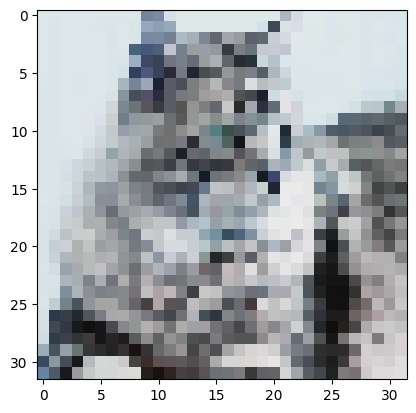

In [8]:
y_pred = model.predict(image_array)

plt.imshow(image_resized)                    # 画像の表示
print(image_array.shape)                     # データ構造の表示
print(np.argmax(y_pred, axis=1))             # 予測したクラス